train
0.019587112777965123
0.029996625988329494
val
0.021698200674430616
0.036427561427543005
test
0.02226239883695658
0.038513103395507904


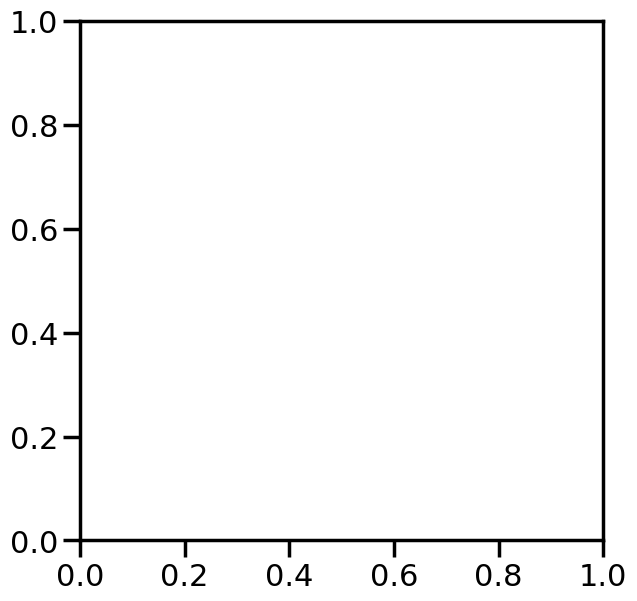

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 1
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")

au2eV = 27.2114079527
atomref = (
    np.array(
        [
            -0.6076034239255682,
            -38.02394959136091,
            -54.68240002983947,
            -75.13150636643554,
            -99.76017790440977,
        ]
    )
    * au2eV
)
for i, method in enumerate(methods):
    energies_qme = all_energies_qme[method] * au2eV
    energies_e = all_energies_e[method] * au2eV
    tmp_qme = energies_qme[:, 1] - energies_qme[:, 0]
    tmp_e = energies_e[:, 1] - energies_e[:, 0]
    energy_mae = mean_absolute_error(tmp_e, tmp_qme)
    energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False)

test
0.02226239883695658
0.038513103395507904


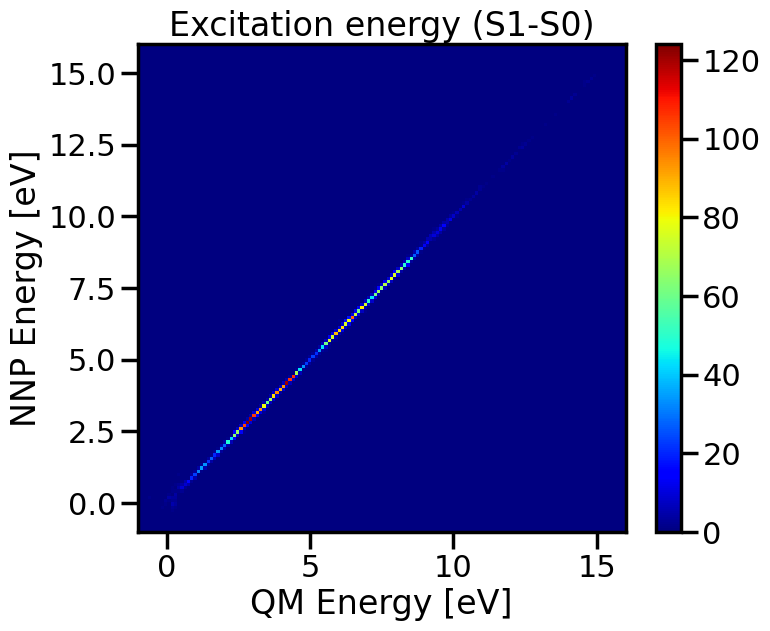

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 1
nrow = 1
fig, axes = plt.subplots(
    figsize=((6.75 + 1.5) * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow
)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")
all_atomref = np.load(f"evaluate_atomref.npz")

au2eV = 27.2114079527
atomref = (
    np.array(
        [
            -0.6076034239255682,
            -38.02394959136091,
            -54.68240002983947,
            -75.13150636643554,
            -99.76017790440977,
        ]
    )
    * au2eV
)
for i, method in enumerate(methods):
    if method != "test":
        continue
    print(method)

    energies_qme = all_energies_qme[method] * au2eV
    energies_e = all_energies_e[method] * au2eV
    atomref = all_atomref[method] * au2eV
    energies_qme -= atomref[:, None]
    energies_e -= atomref[:, None]
    for state in [1]:
        tmp_qme = energies_qme[:, 1] - energies_qme[:, 0]
        tmp_e = energies_e[:, 1] - energies_e[:, 0]
        energy_mae = mean_absolute_error(tmp_e, tmp_qme)
        energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False)
        print(energy_mae)
        print(energy_rmse)

        ax = axes
        emin = -1
        emax = 16
        bins = [np.linspace(emin, emax, 150), np.linspace(emin, emax, 150)]
        H = ax.hist2d(tmp_qme, tmp_e, bins=bins, cmap=cm.jet)
        fig.colorbar(H[3], ax=ax)
        ax.set_title(f"Excitation energy (S{state}-S0)")
        ax.set_xlabel("QM Energy [eV]")
        ax.set_ylabel("NNP Energy [eV]")

        ax.set_aspect("equal")
plt.tight_layout()
plt.show()

test
0.02226239883695658
0.038513103395507904


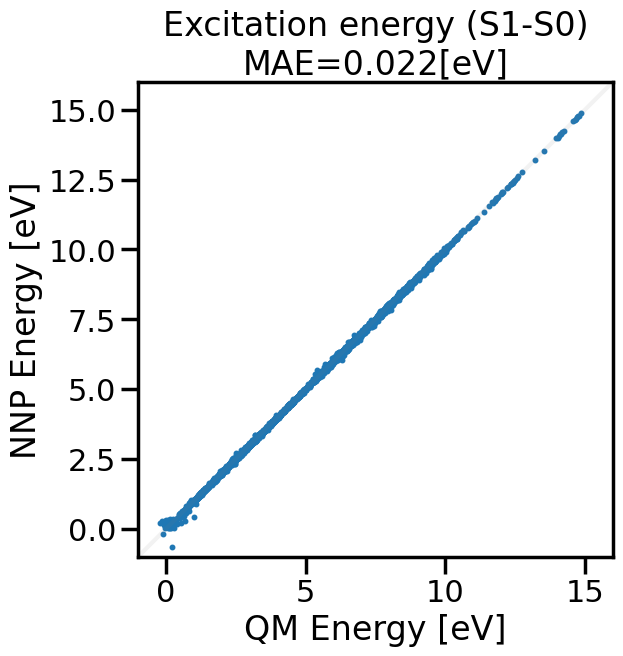

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 1
nrow = 1
fig, axes = plt.subplots(
    figsize=(6.75 * ncol, (6.75 + 1) * nrow), ncols=ncol, nrows=nrow
)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")
all_atomref = np.load(f"evaluate_atomref.npz")

au2eV = 27.2114079527
atomref = (
    np.array(
        [
            -0.6076034239255682,
            -38.02394959136091,
            -54.68240002983947,
            -75.13150636643554,
            -99.76017790440977,
        ]
    )
    * au2eV
)
for i, method in enumerate(methods):
    if method != "test":
        continue
    print(method)
    energies_qme = all_energies_qme[method] * au2eV
    energies_e = all_energies_e[method] * au2eV
    atomref = all_atomref[method] * au2eV
    energies_qme -= atomref[:, None]
    energies_e -= atomref[:, None]

    for state in [1]:
        tmp_qme = energies_qme[:, state] - energies_qme[:, 0]
        tmp_e = energies_e[:, state] - energies_e[:, 0]
        energy_mae = mean_absolute_error(tmp_e, tmp_qme)
        energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False)
        print(energy_mae)
        print(energy_rmse)

        ax = axes
        ax.scatter(tmp_e, tmp_qme, label="S$_%i$" % state, s=5)
        emin = -1
        emax = 16
        ax.set_xlim(emin, emax)
        ax.set_ylim(emin, emax)
        ax.set_title(f"Excitation energy (S{state}-S0)\nMAE={energy_mae:.3f}[eV]")
        ax.set_xlabel("QM Energy [eV]")
        ax.set_ylabel("NNP Energy [eV]")
        x = np.linspace(emin, emax, 1000)
        ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
        ax.set_aspect("equal")
plt.tight_layout()
plt.show()

test
0.05376407298379622
0.07402091517741508
0.058426643312580684
0.08218487914036128


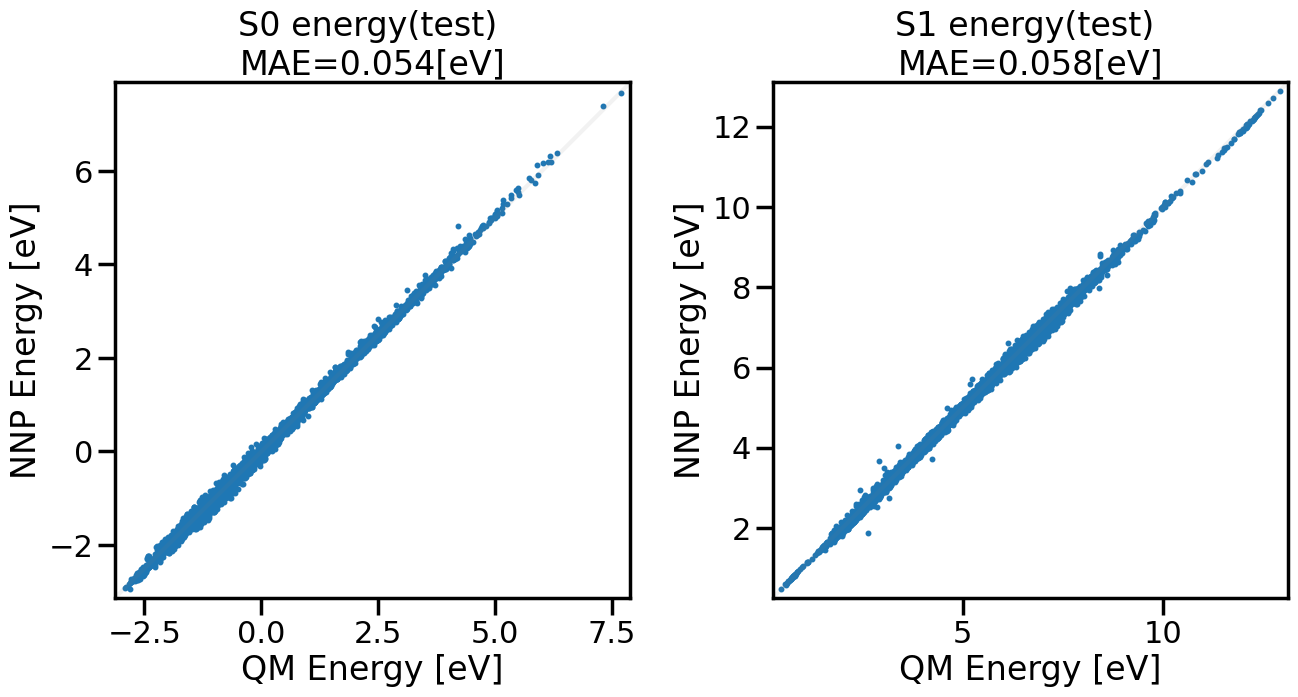

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

ncol = 2
nrow = 1
fig, axes = plt.subplots(
    figsize=(6.75 * ncol, (6.75 + 1) * nrow), ncols=ncol, nrows=nrow
)
methods = ["train", "val", "test"]
titles = ["train", "eval", "test"]

all_energies_qme = np.load(f"evaluate_answer.npz")
all_energies_e = np.load(f"evaluate_prediction.npz")
all_atomref = np.load(f"evaluate_atomref.npz")

au2eV = 27.2114079527

atomref = (
    np.array(
        [
            -0.6069409650923158,
            -38.022040814713684,
            -54.679276694605804,
            -75.13750125356998,
            -99.7367470836966,
        ]
    )
    * au2eV
)
for i, method in enumerate(methods):
    if method != "test":
        continue
    print(method)
    energies_qme = all_energies_qme[method] * au2eV
    energies_e = all_energies_e[method] * au2eV
    atomref = all_atomref[method] * au2eV
    energies_qme -= atomref[:, None]
    energies_e -= atomref[:, None]

    for state in [0, 1]:
        tmp_qme = energies_qme[:, state]
        tmp_e = energies_e[:, state]
        energy_mae = mean_absolute_error(tmp_e, tmp_qme)
        energy_rmse = mean_squared_error(tmp_e, tmp_qme, squared=False)
        print(energy_mae)
        print(energy_rmse)

        ax = axes[state]
        ax.scatter(tmp_e, tmp_qme, label="S$_%i$" % state, s=5)
        emin = min(min(tmp_e), min(tmp_qme)) - 0.2
        emax = max(max(tmp_e), max(tmp_qme)) + 0.2
        ax.set_xlim(emin, emax)
        ax.set_ylim(emin, emax)

        ax.set_title(f"S{state} energy(test) \nMAE={energy_mae:.3f}[eV]")
        ax.set_xlabel("QM Energy [eV]")
        ax.set_ylabel("NNP Energy [eV]")
        x = np.linspace(emin, emax, 1000)
        ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
        ax.set_aspect("equal")
plt.tight_layout()
plt.show()